# *edtools* Demo

**edtools** is a python package for automated processing of a large number of 3D electron diffraction (3D ED) datasets. It can be downloaded from https://doi.org/10.5281/zenodo.5727189. 

For runing *edtools*, *XDS* package for reduction of 3D ED datasets is required. *XDS* package is available at https://xds.mr.mpg.de/html_doc/downloading.html.

A typical cycle of using *edtools* for processing batch 3D ED datasets goes through the following steps:

- `edtools.autoindex`
- `edtools.extract_xds_info`
- `edtools.find_cell`
- `edtools.update_xds`
- `edtools.make_xscale`
- `edtools.cluster`
 
Here we demonstrate the processing of batch 3D ED datasets for phase analysis and structure determination using *edtools*. The datasets for the demo can be downloaded from...
 
The datasets were collected on a zeolite mixture sample using serial rotation electron diffraction (SerialRED) data collection technique implemented in the program **Instamatic** (available at https://doi.org/10.5281/zenodo.5175957), which runs on a JEOL JEM-2100-LaB6 at 200 kV equipped with a 512 x 512 Timepix hybrid pixel detector (55 x 55 µm pixel size, QTPX-262k, Amsterdam Scientific Instruments).

The zeolite mixture sample contains phases **IWV**，**RTH**, and ***CTH**. The information of these three phases can be found from the structure database of zeolites (https://europe.iza-structure.org/IZA-SC/ftc_table.php).

This demo takes around 5-10 min to run on a normal desktop computer with all the required packages installed properly beforehand.


## 1. Indexing

Automatically index the 3D ED datasets by running *XDS* in all subfolders (SMV) that contains file `XDS.INP`, which is automatically generated during data collection using *Instamatic*.

In [1]:
!edtools.autoindex

16 files named XDS.INP (subdir: None) found.

   0: C:\Users\yluo\demo\data\stagepos_0067\crystal_0001\SMV  # Tue May  3 19:58:34 2022
Spgr    5 - Cell      26.93     14.05      5.36     90.00     90.89     90.00 - Vol    2027.80

   #   dmax  dmin    ntot   nuniq   compl   i/sig   rmeas CC(1/2)     ISa   B(ov)
   #   dmax  dmin    ntot   nuniq   compl   i/sig   rmeas CC(1/2)     ISa   B(ov)
---------------------------------------------------------------------------------
   0   4.35  0.80     583     324    15.0    4.59    13.7    98.6    7.47    6.72
   -   0.85  0.80      54      42    12.5    1.96    26.8    91.2


   1: C:\Users\yluo\demo\data\stagepos_0164\crystal_0000\SMV  # Tue May  3 19:58:35 2022
Spgr    1 - Cell       9.49      9.90     12.47     66.56     89.45     86.35 - Vol    1072.59

   #   dmax  dmin    ntot   nuniq   compl   i/sig   rmeas CC(1/2)     ISa   B(ov)
   1   6.39  0.80     229     209     4.8   24.01    22.3    96.2   50.00    4.74
   -   0.91  0.85      3

## 2. Extract cell

Extract the determined unit cell parameters from the output files (`CORRECT.LP`) of *XDS* 

In [2]:
!edtools.extract_xds_info

14 files named CORRECT.LP (subdir: None) found.
   1: C:\Users\yluo\demo\data\stagepos_0067\crystal_0001\SMV  # Tue May  3 19:58:34 2022
Spgr    5 - Cell      26.93     14.05      5.36     90.00     90.89     90.00 - Vol    2027.80

   2: C:\Users\yluo\demo\data\stagepos_0164\crystal_0000\SMV  # Tue May  3 19:58:35 2022
Spgr    1 - Cell       9.49      9.90     12.47     66.56     89.45     86.35 - Vol    1072.59

   3: C:\Users\yluo\demo\data\stagepos_0299\crystal_0001\SMV  # Tue May  3 19:58:38 2022
Spgr    1 - Cell       4.83     14.83     16.03    115.66     89.61     94.16 - Vol    1031.87

   4: C:\Users\yluo\demo\data\stagepos_0325\crystal_0000\SMV  # Tue May  3 19:58:40 2022
Spgr    5 - Cell      13.69     25.42     14.90     90.00    115.84     90.00 - Vol    4666.87

   5: C:\Users\yluo\demo\data\stagepos_0341\crystal_0000\SMV  # Tue May  3 19:58:42 2022
Spgr    5 - Cell      25.67     13.50     17.73     90.00    132.44     90.00 - Vol    4534.43

   6: C:\Users\yluo\demo\da

## 3. Unit-cell-based clustering for phase analysis

In [ ]:
!edtools.find_cell cells.yaml -s --cluster --metric lcv

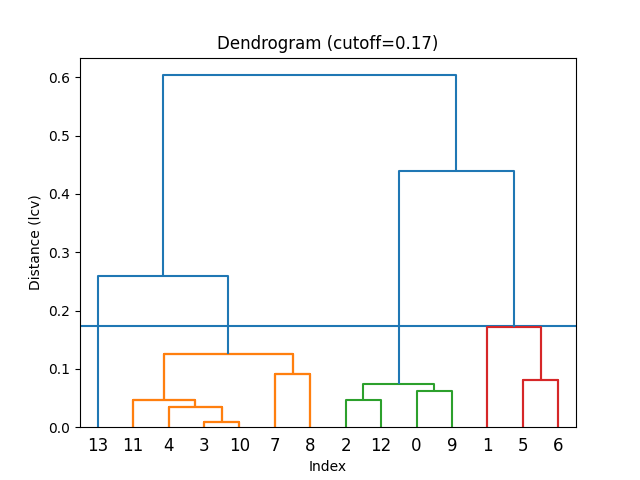

In [7]:
from IPython.display import Image
Image('https://github.com/instamatic-dev/edtools/raw/master/docs/examples/find_cell_step3.png', embed=True)

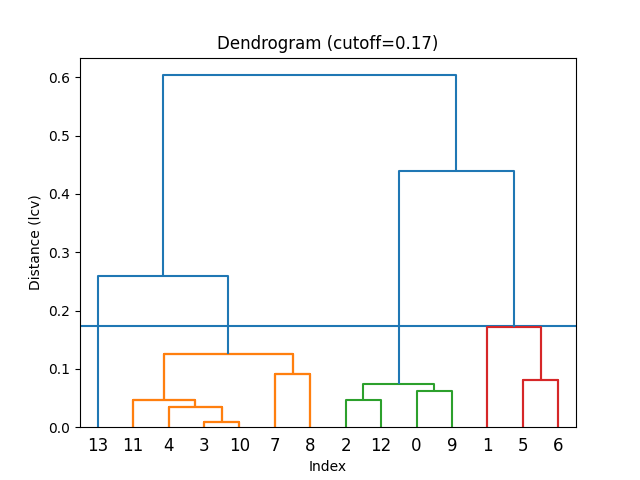

In [8]:
Image('find_cell_step3.png', embed=True)

In [9]:
from IPython.display import Image
Image('https://github.com/instamatic-dev/edtools/raw/master/docs/examples/find_cell_step3.png', embed=False)

In [10]:
Image('find_cell_step3.png', embed=False)

![find_cell_step3.png](https://github.com/instamatic-dev/edtools/raw/master/docs/examples/find_cell_step3.png)

Console Output

```
Linkage method = average
Cutoff distance = 0.1735
Distance metric = lcv

----------------------------------------

Cluster #1 (6 items)
    4 [  14.04   14.39   14.72   76.68   62.79   61.86]  Vol.: 2331.3
    5 [  13.50   14.38   14.63   75.73   64.60   63.07]  Vol.: 2283.0
    8 [  13.89   14.29   17.00   72.43   63.61   63.57]  Vol.: 2684.8
    9 [  14.81   15.07   15.52   62.45   74.78   62.16]  Vol.: 2711.1
   11 [  13.73   14.56   16.03   84.26   68.05   62.57]  Vol.: 2629.5
   12 [  14.43   14.90   15.40   81.24   74.01   61.15]  Vol.: 2787.8
 ---
Mean: [  14.07   14.60   15.55   75.46   67.97   62.40]  Vol.: 2571.3
 Min: [  13.50   14.29   14.63   62.45   62.79   61.15]  Vol.: 2283.0
 Max: [  14.81   15.07   17.00   84.26   74.78   63.57]  Vol.: 2787.8

Cluster #3 (4 items)
    1 [   5.47   14.07   15.30   63.22   87.59   88.58]  Vol.: 1050.9
    3 [   5.33   14.99   16.06   64.44   89.16   82.51]  Vol.: 1144.9
   10 [   5.05   14.37   14.53   62.13   88.52   89.11]  Vol.:  932.0
   13 [   5.30   14.89   15.18   66.79   86.51   86.59]  Vol.: 1098.1
 ---
Mean: [   5.29   14.58   15.27   64.15   87.95   86.70]  Vol.: 1056.5
 Min: [   5.05   14.07   14.53   62.13   86.51   82.51]  Vol.:  932.0
 Max: [   5.47   14.99   16.06   66.79   89.16   89.11]  Vol.: 1144.9

Cluster #4 (3 items)
    2 [   9.52    9.98   12.85   65.60   87.80   85.43]  Vol.: 1107.8
    6 [  10.21   10.36   12.08   85.86   67.02   81.83]  Vol.: 1165.3
    7 [  10.55   10.75   11.75   80.34   66.42   75.73]  Vol.: 1179.4
 ---
Mean: [  10.09   10.36   12.23   77.27   73.75   81.00]  Vol.: 1150.9
 Min: [   9.52    9.98   11.75   65.60   66.42   75.73]  Vol.: 1107.8
 Max: [  10.55   10.75   12.85   85.86   87.80   85.43]  Vol.: 1179.4

Wrote cluster 3 to file `cells_cluster_3_4-items.yaml`
Wrote cluster 4 to file `cells_cluster_4_3-items.yaml`
Wrote cluster 1 to file `cells_cluster_1_6-items.yaml`
```


The three resulted clusters 1, 3, 4 correspond to phases **IWV**, ***CTH**, and **RTH**, respectively.

With the averaged primitive unit cell parameters of each cluster, one can use the online tool http://cci.lbl.gov/cctbx/lattice_symmetry.html to find unit cell with higher symmetry with a pre-set tolerance.

We take cluster 1 (phase **IWV**) as an example. The averaged unit cell parameters are:
14.07, 14.6, 15.55, 75.46, 67.97, 62.4
 
The unit cell parameters with a higher symmetry (space group: *Fmmm* (69)) are:
14.07, 25.8828, 28.9294, 90, 90, 90

The same operation can be done for all the other clusters.

## 4. Update the *XDS.INP* files

This step used `edtools.update_xds` to update the XDS input files with the determined unit cell parameters and space group.

In [6]:
!edtools.update_xds -c 14.07 25.8828 28.9294 90 90 90 -s 69

16 files named XDS.INP (subdir: None) found.
 C:\Users\yluo\demo\data\stagepos_0067\crystal_0001\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0164\crystal_0000\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0290\crystal_0002\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0299\crystal_0001\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0325\crystal_0000\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0341\crystal_0000\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0368\crystal_0001\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0538\crystal_0000\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0648\crystal_0001\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0849\crystal_0000\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0905\crystal_0000\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0905\crystal_0001\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_0980\crystal_0000\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_1014\crystal_0000\SMV\XDS.INP
 C:\Users\yluo\demo\data\stagepos_1261\crystal_0001\SMV\XDS

## 5. Refine phases

Rerun **autoindex**, **extract_xds_info** and **find_cell** for the desired phases to be successfully indexed by *XDS*. All the other phases are hopefully excluded in that a phase with different enough unit cell will not be indexed successfully. There are however cases when different phases have similar unit cells, which cannot be told apart during this step.

In [7]:
!edtools.autoindex

16 files named XDS.INP (subdir: None) found.

   4: C:\Users\yluo\demo\data\stagepos_0325\crystal_0000\SMV  # Tue May  3 20:16:50 2022
Spgr   69 - Cell      13.88     25.44     27.26     90.00     90.00     90.00 - Vol    9625.70

   #   dmax  dmin    ntot   nuniq   compl   i/sig   rmeas CC(1/2)     ISa   B(ov)
   4   9.30  0.80    3938    1852    69.0    3.24    20.2    99.3   11.45    8.21
   -   0.91  0.85     614     290    74.4    0.86   109.5    80.9


   5: C:\Users\yluo\demo\data\stagepos_0341\crystal_0000\SMV  # Tue May  3 20:16:52 2022
Spgr   69 - Cell      13.52     24.94     27.07     90.00     90.00     90.00 - Vol    9127.70

   #   dmax  dmin    ntot   nuniq   compl   i/sig   rmeas CC(1/2)     ISa   B(ov)
   5  10.88  0.80    2203    1029    40.4    3.84    11.7    99.9   27.38    9.78
   -   1.07  0.98     299     135    41.8    1.04   107.2    75.6


   8: C:\Users\yluo\demo\data\stagepos_0648\crystal_0001\SMV  # Tue May  3 20:16:57 2022
Spgr   69 - Cell      14.01    

In [8]:
!edtools.extract_xds_info

7 files named CORRECT.LP (subdir: None) found.
   1: C:\Users\yluo\demo\data\stagepos_0325\crystal_0000\SMV  # Tue May  3 20:16:50 2022
Spgr   69 - Cell      13.88     25.44     27.26     90.00     90.00     90.00 - Vol    9625.70

   2: C:\Users\yluo\demo\data\stagepos_0341\crystal_0000\SMV  # Tue May  3 20:16:52 2022
Spgr   69 - Cell      13.52     24.94     27.07     90.00     90.00     90.00 - Vol    9127.70

   3: C:\Users\yluo\demo\data\stagepos_0648\crystal_0001\SMV  # Tue May  3 20:16:57 2022
Spgr   69 - Cell      14.01     25.97     29.04     90.00     90.00     90.00 - Vol   10565.90

   4: C:\Users\yluo\demo\data\stagepos_0849\crystal_0000\SMV  # Tue May  3 20:16:59 2022
Spgr   69 - Cell      15.10     26.02     26.72     90.00     90.00     90.00 - Vol   10498.34

   5: C:\Users\yluo\demo\data\stagepos_0905\crystal_0001\SMV  # Tue May  3 20:17:03 2022
Spgr   69 - Cell      13.83     25.80     28.73     90.00     90.00     90.00 - Vol   10251.27

   6: C:\Users\yluo\demo\dat

In [ ]:
!edtools.find_cell cells.yaml --cluster --metric lcv

![find_cell_step5.png](https://github.com/instamatic-dev/edtools/raw/master/docs/examples/find_cell_step5.png)

Console Output

```
Linkage method = average
Cutoff distance = 0.0564
Distance metric = lcv

----------------------------------------

Cluster #1 (7 items)
    1 [  13.97   25.49   27.12   90.00   90.00   90.00]  Vol.: 9657.9
    2 [  13.53   25.01   27.18   90.00   90.00   90.00]  Vol.: 9195.6
    3 [  14.03   26.02   29.55   90.00   90.00   90.00]  Vol.: 10790.3
    4 [  14.94   26.14   26.94   90.00   90.00   90.00]  Vol.: 10522.3
    5 [  13.85   25.79   29.03   90.00   90.00   90.00]  Vol.: 10364.0
    6 [  14.52   24.95   28.11   90.00   90.00   90.00]  Vol.: 10184.6
    7 [  13.53   25.13   27.15   90.00   90.00   90.00]  Vol.: 9233.7
 ---
Mean: [  14.05   25.50   27.87   90.00   90.00   90.00]  Vol.: 9992.6
 Min: [  13.53   24.95   26.94   90.00   90.00   90.00]  Vol.: 9195.6
 Max: [  14.94   26.14   29.55   90.00   90.00   90.00]  Vol.: 10790.3

Wrote cluster 1 to file `cells_cluster_1_7-items.yaml`
```

## 6. Generate the input file for *XSCALE* 

This command generates the desired unit cell cluster for *XSCALE*.

In [10]:
!edtools.make_xscale cells_cluster_1_7-items.yaml -c 14.05 25.50 27.87 90.00 90.00 90.00 -s 69

Loaded 7 cells
Lowest possible symmetry for 69 (oF): 22

Using:
  SPACE_GROUP_NUMBER= 69
  UNIT_CELL_CONSTANTS= 14.050 25.500 27.870 90.000 90.000 90.000

Wrote file XSCALE.INP
Wrote file XDSCONV.INP


## 7. Run *XSCALE* 

*XSCALE* calculates the correlation coefficients between different datasets.

In [11]:
!wsl xscale


 ***** XSCALE ***** (VERSION Jan 10, 2022  BUILT=20220220)   3-May-2022
 Author: Wolfgang Kabsch
 Copy licensed until 31-Mar-2023 to
  academic users for non-commercial applications
 No redistribution.


 ******************************************************************************
                              CONTROL CARDS
 ******************************************************************************

 SAVE_CORRECTION_IMAGES= FALSE                                                
 SPACE_GROUP_NUMBER= 69                                                       
 UNIT_CELL_CONSTANTS= 14.050 25.500 27.870 90.000 90.000 90.000               
                                                                              
 OUTPUT_FILE= MERGED.HKL                                                      
                                                                              
     INPUT_FILE= data/stagepos_0325/crystal_0000/SMV/XDS_ASCII.HKL            
     INCLUDE_RESOLUTION_RANGE= 20 0.8

## 8. Intensity-based clustering

Run intensity-based clustering to further filter out datasets with low correlation (to remove poor quality datasets), or from a different phase that with similar enough unit cell. Cut-off on the dendrogram is selected manually. A number below 0.4 can be a good starting choice.

In the end, integration results from datasets corresponding to different clusters are automatically copied to different folders after running clustering. The merged intensities in file `shelx.hkl` can be used for structure determination.

In [ ]:
!edtools.cluster

![intensity_cluster.png](https://github.com/instamatic-dev/edtools/raw/master/docs/examples/intensity_cluster.png)

Console Output

```
Running XSCALE on cluster 1

Clustering results

Cutoff distance: 0.259
Equivalent CC(I): 0.966
Method: average

  #  N_clust   CC(1/2)    N_obs   N_uniq   N_poss    Compl.   N_comp    R_meas    d_min  i/sigma  | Lauegr.  prob. conf.  idx
  1***     5     96.6*    10778     2522     2690     93.8*    10458    0.285*     0.80     3.23
(Sorted by 'Completeness')

Cluster 1: [1, 2, 3, 5, 7]
```

## Instruction for using on your own data

- Install **edtools** and all software dependencies on your system
- Put all your 3D ED datasets in one folder. All the 3D ED datasets are expected to be in some *XDS* readable image format, e.g. SMV. A correctly configured *XDS.INP* file is also expected for each dataset.
- Open Windows command prompt from the root directory which contains all the datasets
- Follow the demo